<h1>Ejercicios Prácticos</h1>
<h1>Task 2.1 - Gradiente Descendiente Estocástico</h1>
<p>Implemente el descenso de gradiente estocástico, el descenso de gradiente y el descenso de gradiente por mini batches para una función polinómica de grado 3. Luego, grafique la función aproximada por cada uno de los métodos solicitados y la distribución real de puntos. Para esto considere que:
El polinomio que debe usar es 2 * x**3 - 3 * x**2 + 5 * x + 3
Considere el uso de np.polyval
Considere el uso de np.polyder
Compare el tiempo de ejecución de cada uno de los métodos solicitados. De esto, mencione cuál método fue más rápido y por qué.
Compare el fitness de cada método solicitado (recuerde hacer una evaluación numérica y no sólo visual). De esto mencione cuál método lo hizo mejor y por qué
 </p>




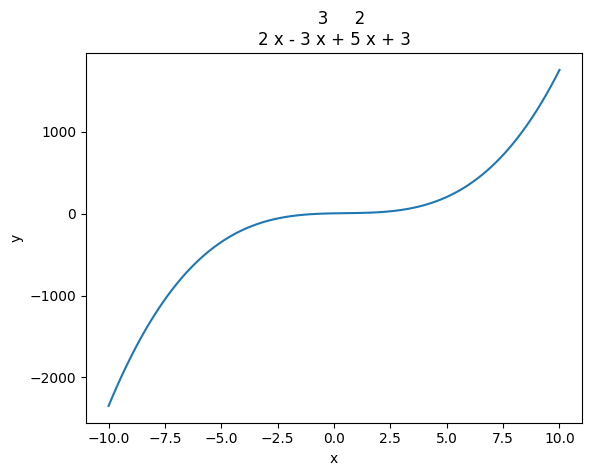

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Configurar el arreglo con los coeficientes del polinomio
coefficients = [2, -3, 5, 3]
# crear el objeto del polinomio
polynomial = np.poly1d(coefficients, variable = 'x')
# hacer el eje x y graficar los puntos del eje y
x = np.linspace(-10, 10, 100)
y = polynomial(x)
# poner las leyendas de los ejes
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'{polynomial}')
# graficar el polinomio
plt.plot(x, y, label=str(polynomial))

Iteration 1, Loss: 0.0
Iteration 2, Loss: 0.0
Iteration 3, Loss: 0.0
Iteration 4, Loss: 0.0
Iteration 5, Loss: 0.0
Iteration 6, Loss: 0.0
Iteration 7, Loss: 0.0
Iteration 8, Loss: 0.0
Iteration 9, Loss: 0.0
Iteration 10, Loss: 0.0
Iteration 11, Loss: 0.0
Iteration 12, Loss: 0.0
Iteration 13, Loss: 0.0
Iteration 14, Loss: 0.0
Iteration 15, Loss: 0.0
Iteration 16, Loss: 0.0
Iteration 17, Loss: 0.0
Iteration 18, Loss: 0.0
Iteration 19, Loss: 0.0
Iteration 20, Loss: 0.0
Iteration 21, Loss: 0.0
Iteration 22, Loss: 0.0
Iteration 23, Loss: 0.0
Iteration 24, Loss: 0.0
Iteration 25, Loss: 0.0
Iteration 26, Loss: 0.0
Iteration 27, Loss: 0.0
Iteration 28, Loss: 0.0
Iteration 29, Loss: 0.0
Iteration 30, Loss: 0.0
Iteration 31, Loss: 0.0
Iteration 32, Loss: 0.0
Iteration 33, Loss: 0.0
Iteration 34, Loss: 0.0
Iteration 35, Loss: 0.0
Iteration 36, Loss: 0.0
Iteration 37, Loss: 0.0
Iteration 38, Loss: 0.0
Iteration 39, Loss: 0.0
Iteration 40, Loss: 0.0
Iteration 41, Loss: 0.0
Iteration 42, Loss: 0.0
I

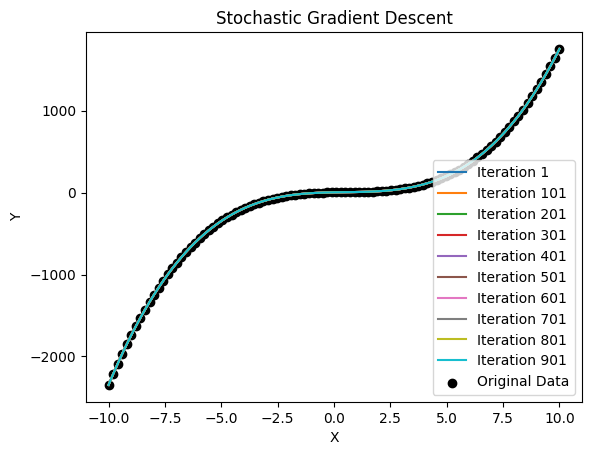

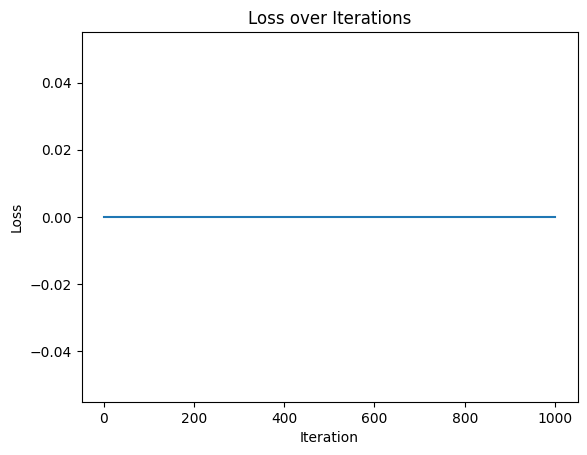

Result: [ 3.  5. -3.  2.]


In [3]:
import numpy as np
import random as rand
import matplotlib.pyplot as plt

# Gradiente descendiente

# Configurar el arreglo con los coeficientes del polinomio
coefficients = [2, -3, 5, 3]
# Crear el objeto del polinomio
polynomial = np.poly1d(coefficients, variable='x')

# Parámetro de inicialización
i = rand.uniform(-10, 10)
# Obtener los pesos (coeficientes del polinomio)
w = coefficients[::-1]

# Calcular la derivada del polinomio
der = np.polyder(polynomial)

# eta (learning rate)
eta = 0.01

def prediction(i, w):
    # Predecir el resultado para y sumando los pesos del polinomio
    return sum(w[j] * (i ** j) for j in range(len(w)))

def lossFunct(predicted_out, real_out):
    # Para usar el MSE (nuestra función de pérdida)
    return ((predicted_out - real_out) ** 2) / 2

def calcGradient(i, w, predicted_out, real_out):
    gradient = np.array([i ** j for j in range(len(w))]) * (predicted_out - real_out)
    return gradient

def stochasticGradientDescent(i, w, eta, polynomial, epochs=1000):
    # para guardar los datos
    iterations = []
    losses = []

    for iter in range(epochs):
        real_out = polynomial(i)  # evaluar el valor real del polinomio
        predicted_out = prediction(i, w)
        loss = lossFunct(predicted_out, real_out)
        gradient = calcGradient(i, w, predicted_out, real_out)

        # Actualizar los pesos, el gradiente y el learning rate
        w = w - eta * gradient

        # Almacenar resultados para graficar
        iterations.append(iter + 1)
        losses.append(loss)

        # Imprimir la pérdida por cada iteración
        print(f'Iteration {iter + 1}, Loss: {loss}')

        if iter % 100 == 0:
            # Plot the current polynomial approximation
            x_values = np.linspace(-10, 10, 100)
            y_values = np.polyval(w[::-1], x_values)
            plt.plot(x_values, y_values, label=f'Iteration {iter + 1}')

    # GRaficar los puntos originales
    x_data = np.linspace(-10, 10, 100)
    y_data = polynomial(x_data)
    plt.scatter(x_data, y_data, color='black', label='Original Data')

    # Labels
    plt.title('Stochastic Gradient Descent')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.show()

    # Graficar la perdida a traves de las operaciones
    plt.plot(iterations, losses)
    plt.title('Loss over Iterations')
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.show()

    return w

result = stochasticGradientDescent(i, w, eta, polynomial)
print("Result: " + str(result))


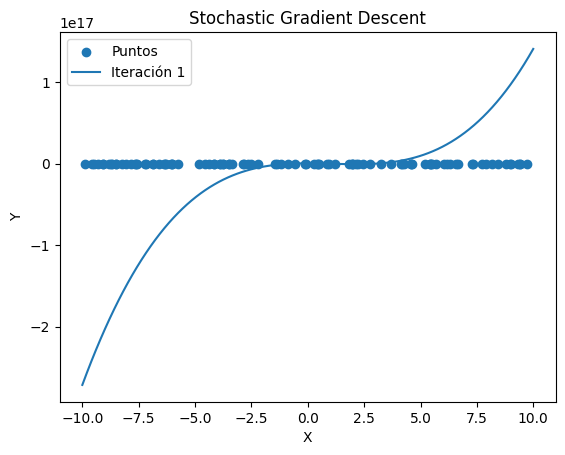

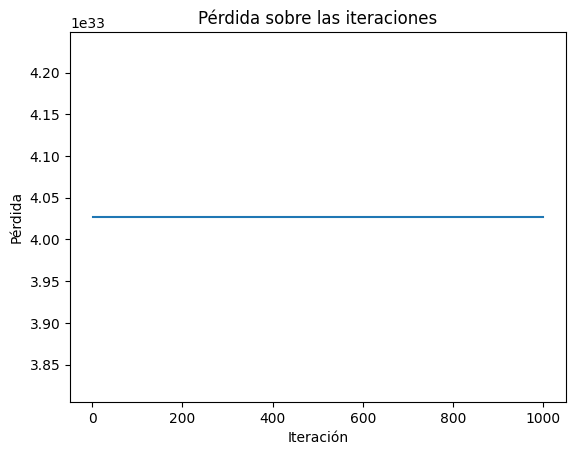

In [4]:
#Usando Scikitlearn
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

coefficients = [2, -3, -5, 3]

np.random.seed(42)

X = np.random.uniform(-10, 10, 100).reshape(-1, 1)
y = np.polyval(coefficients[::-1], X.squeeze()) + np.random.normal(0, 5, 100)

# Crear un SDGRegressor con un polinomio de transformacion de features
degree = len(coefficients) - 1
model = make_pipeline(PolynomialFeatures(degree), SGDRegressor(max_iter=1000, learning_rate='optimal', random_state=42))

# Entrenar el modelo
iterations = []
losses = []

# Stochastic Gradient Descent
for iteration in range(1000):
    model.fit(X, y)
    predicted_values = model.predict(X)
    loss = np.mean((predicted_values - y) ** 2) / 2

    # Store results for plotting
    iterations.append(iteration + 1)
    losses.append(loss)

    if iteration % 1000 == 0:
        # Graficar los puntos 
        plt.scatter(X, y, label='Puntos')
        x_values = np.linspace(-10, 10, 100).reshape(-1, 1)
        y_values = model.predict(x_values)
        plt.plot(x_values, y_values, label=f'Iteración {iteration}')
        plt.title('Stochastic Gradient Descent')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.legend()
        plt.show()

# Graficar la pérdida sobre las iteraciones
plt.plot(iterations, losses)
plt.title('Pérdida sobre las iteraciones')
plt.xlabel('Iteración')
plt.ylabel('Pérdida')
plt.show()


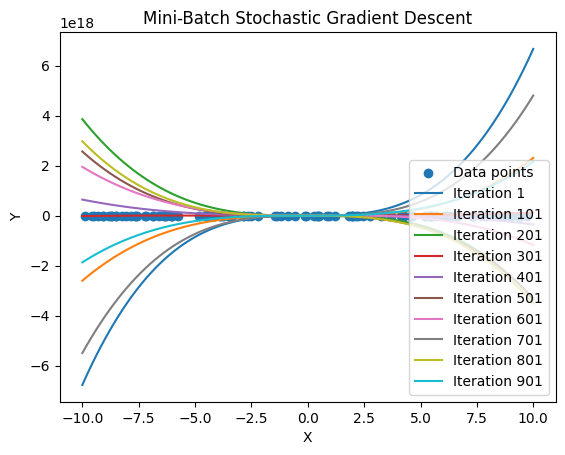

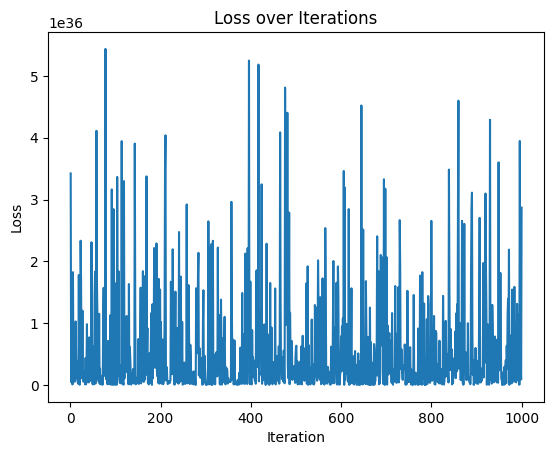

In [2]:
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# Define the polynomial coefficients
coefficients = [2, -3, 5, 3]

# Create synthetic data for training
np.random.seed(42)
X = np.random.uniform(-10, 10, 100).reshape(-1, 1)
y = np.polyval(coefficients[::-1], X.squeeze()) + np.random.normal(0, 5, 100)

# Create an SGDRegressor with a polynomial feature transformation
degree = len(coefficients) - 1
model = make_pipeline(PolynomialFeatures(degree), SGDRegressor(max_iter=1000, learning_rate='optimal', random_state=42))

# Parameters for mini-batch SGD
batch_size = 10
num_batches = len(X) // batch_size

# Arrays to store results for plotting
iterations = []
losses = []

# Plot the original data points
plt.scatter(X, y, label='Data points')

# Perform Mini-Batch Stochastic Gradient Descent
for iteration in range(1000):
    # Shuffle the data for each iteration
    indices = np.random.permutation(len(X))
    X_shuffled = X[indices]
    y_shuffled = y[indices]

    for batch in range(num_batches):
        start_idx = batch * batch_size
        end_idx = (batch + 1) * batch_size
        X_batch = X_shuffled[start_idx:end_idx]
        y_batch = y_shuffled[start_idx:end_idx]

        model.fit(X_batch, y_batch)

    # Calculate loss using the entire dataset
    predicted_values = model.predict(X)
    loss = np.mean((predicted_values - y) ** 2) / 2

    # Store results for plotting
    iterations.append(iteration + 1)
    losses.append(loss)

    if iteration % 100 == 0:
        # Update the plot with the current polynomial
        x_values = np.linspace(-10, 10, 100).reshape(-1, 1)
        y_values = model.predict(x_values)
        plt.plot(x_values, y_values, label=f'Iteration {iteration + 1}')

# Add labels and legend
plt.title('Mini-Batch Stochastic Gradient Descent')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

# Plot the loss over iterations
plt.plot(iterations, losses)
plt.title('Loss over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()



<h1> Task 2.2 Feature Selection </h1>
<p>Tome de nuevo el dataset del laboratorio pasado referente a la clasificación de Partidas de League of Legends. Recuerde que lo puede descargar de este enlace. Sobre este aplique al menos 3 técnicas de feature selection distintas, y con el dataset resultante vuelva a ajustar el modelo de Support Vector Machine (de la librería Sklearn). Recuerde que:

<br>● Debe definir una métrica de desempeño y justificar el por qué de esta métrica
<br>● Mida el performance de su modelo con las tres técnicas de feature selection y compare cada una de ellas. Es decir, debe tener al menos 4 valores a comparar (el obtenido en el laboratorio pasado, y al menos 3 de las técnicas de feature selection)
<br>● De las medidas obtenidas, diga qué versión lo hizo mejor y por qué.
<br>● Recuerde que para hacer parameter tuning, deben usar las mismas columnas seleccionadas después del feature selection
<br>● Recuerde que su variable objetivo es “blueWins”</p>


In [1]:
# Cargando el dataset para iniciar el proceso de selección de características y ajuste del modelo SVM
import pandas as pd

# Asumiendo que el archivo CSV está en el mismo directorio que tu notebook Jupyter
data_path = 'high_diamond_ranked_10min.csv'
df = pd.read_csv(data_path)

print(df.isnull().sum())

X = df.drop('blueWins', axis=1)
y = df['blueWins']


gameId                          0
blueWins                        0
blueWardsPlaced                 0
blueWardsDestroyed              0
blueFirstBlood                  0
blueKills                       0
blueDeaths                      0
blueAssists                     0
blueEliteMonsters               0
blueDragons                     0
blueHeralds                     0
blueTowersDestroyed             0
blueTotalGold                   0
blueAvgLevel                    0
blueTotalExperience             0
blueTotalMinionsKilled          0
blueTotalJungleMinionsKilled    0
blueGoldDiff                    0
blueExperienceDiff              0
blueCSPerMin                    0
blueGoldPerMin                  0
redWardsPlaced                  0
redWardsDestroyed               0
redFirstBlood                   0
redKills                        0
redDeaths                       0
redAssists                      0
redEliteMonsters                0
redDragons                      0
redHeralds    

##### Eliminación recursiva


In [2]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
rfe = RFE(estimator=model, n_features_to_select=10)
X_rfe = rfe.fit_transform(X, y)


##### Caracteristicas mas importantes

In [6]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
rfe = RFE(estimator=model, n_features_to_select=10)
X_rfe = rfe.fit_transform(X, y)


#### Univariable

In [7]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2

# Escalar los datos para que todas las características sean no negativas
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar SelectKBest con chi2
selector = SelectKBest(chi2, k=10)
X_kbest = selector.fit_transform(X_scaled, y)


#### Modelo SVM y evaluación

In [4]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Ajustar un modelo Random Forest al dataset completo
forest = RandomForestClassifier(n_estimators=100, random_state=42)
forest.fit(X, y)

# Obtener la importancia de las características
importances = forest.feature_importances_

# Obtener los índices de las 10 características más importantes
indices = np.argsort(importances)[-10:]

# Seleccionar las características más importantes en X
X_importance = X.iloc[:, indices]


##### Parameter Tuning

In [5]:
from sklearn.model_selection import GridSearchCV

parameters = {'C': [0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1, 1]}
svm = SVC()
clf = GridSearchCV(svm, parameters)
clf.fit(X_train, y_train)

# Mejores parámetros y puntuación
print(clf.best_params_)
print(clf.best_score_)

NameError: name 'SVC' is not defined

<h1> Task 2.3 Perceptrón </h1>
<p>T
Implemente un perceptrón de una sola capa para realizar una clasificación binaria del dataset de Iris(incluido en sklearn.datasets.load_iris). Visualice la frontera de decisión que fue aprendida por el perceptrón.
Recuerde que:
<br>● Debe cargar el dataset de Iris desde la librería mencionada
<br>● Use solamente dos features, siendo estos sepal length y sepal width
<br>● Asegúrese de que su clase Perceptron tenga los métodos de fit y predict
<br>● Visualice la frontera de decisión
<br>○ El eje Y debería ser sepal width y el eje X debería ser sepal length
<br>● Debe definir una métrica de desempeño y justificar el por qué de esta métrica. Con dicha métrica, evalúe el
rendimiento de su modelo. Es decir, diga si lo hizo bien o no y el por qué.</p>


<h1>Implementacion de perceptrón</h1>

In [166]:
# Imports necesarios
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

In [167]:
def unit_step_func(x):
    return np.where(x > 0 , 1, 0)

In [168]:
class Perceptron:
    """sacado de: https://www.youtube.com/watch?v=aOEoxyA4uXU&t=736s
    """
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.activation_func = unit_step_func
        self.weights = None
        self.bias = None


    def fit(self, X, y):
        n_samples, n_features = X.shape

        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        y_ = np.where(y > 0 , 1, 0)

        # learn weights
        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation_func(linear_output)

                # Perceptron update rule
                update = self.lr * (y_[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update


    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self.activation_func(linear_output)
        return y_predicted

<h1>Cargar dataset Iris </h1>

In [169]:
#cargar data
iris = load_iris()

In [170]:
# Usar solo dos features: sepal length y sepal width
X = iris.data[:, :2]  # Solo tomamos las dos primeras columnas
y = (iris.target != 0).astype(int)  # Convertir a clasificación binaria

In [171]:
# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [172]:
# Entrenar el perceptrón
p = Perceptron(learning_rate=0.01, n_iters=1000)
p.fit(X_train, y_train)
predictions = p.predict(X_test)


In [173]:
# Calcular la precisión de la clasificación
accuracy = accuracy_score(y_test, predictions)
print("Perceptron classification accuracy:", accuracy)


Perceptron classification accuracy: 1.0


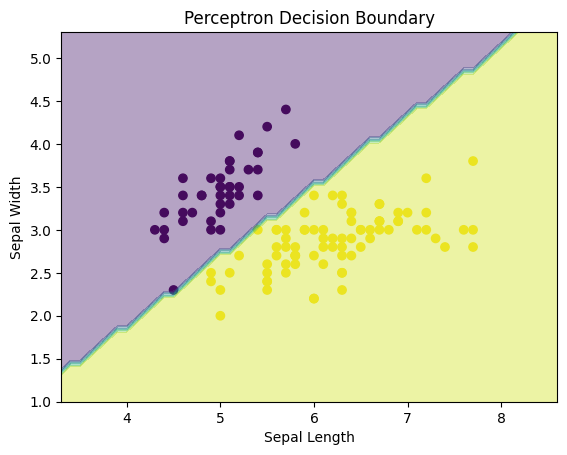

In [175]:
# Visualizar la frontera de decisión aprendida por el perceptrón
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# Scatter plot de los datos de entrenamiento
plt.scatter(X_train[:, 0], X_train[:, 1], marker="o", c=y_train)

# Calcular los puntos para la línea de decisión
x0_min, x0_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
x1_min, x1_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x0_min, x0_max, 0.1),
                     np.arange(x1_min, x1_max, 0.1))
Z = p.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot de la línea de decisión
plt.contourf(xx, yy, Z, alpha=0.4)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Perceptron Decision Boundary')

plt.show()